# 自作データセットの学習


## データセットの自作

In [225]:
import numpy  as np
import os
import glob 
import re

import matplotlib.pyplot as plt

from PIL import Image

%matplotlib inline

## osを使用する場合

In [226]:
path = './training/' 
flist = os.listdir(path)

In [227]:
flist

['cat1.jpeg',
 '.DS_Store',
 'cat4.jpeg',
 'dog3.jpeg',
 'dog.1.jpeg',
 'dog2.jpeg',
 'cat5.jpeg',
 'cat2.jpeg',
 'dog5.jpeg',
 'dog4.jpeg',
 'cat3.jpeg']

## globを使用する場合

In [228]:
img_list = glob.glob(path + '/*' + ".jpeg")

In [229]:
img_list 

['./training/cat1.jpeg',
 './training/cat4.jpeg',
 './training/dog3.jpeg',
 './training/dog.1.jpeg',
 './training/dog2.jpeg',
 './training/cat5.jpeg',
 './training/cat2.jpeg',
 './training/dog5.jpeg',
 './training/dog4.jpeg',
 './training/cat3.jpeg']

# イメージのロード、配列化、リサイズ、データセット作成

In [230]:
# np.resizeはだめ、ぜったい

dog_img_array = np.empty((0,224,224,3))
cat_img_array = np.empty((0,224,224,3))

for img in img_list:
    
    # ファイル名に'dog'が含まれるイメージ
    if re.search('dog', img):
        
        dog_img = Image.open(img)
        
        # サイズを揃える
        dog_img = dog_img.resize((224, 224))
        
        # PIL.Image.Imageからnumpy配列へ
        dog_img = np.array(dog_img)
        
        # 正規化
        dog_img = dog_img / 255.0
        
        # axisの追加
        dog_img = dog_img.reshape((1,224,224,3))
        
        dog_img_array = np.concatenate([dog_img_array, dog_img], axis = 0)
    
    # ファイル名に'cat'が含まれるイメージ
    if re.search('cat', img):
        
        cat_img = Image.open(img)
        
        cat_img = cat_img.resize((224, 224))
        
        cat_img = np.array(cat_img)
        
        cat_img = cat_img / 255.0
        
        cat_img = cat_img.reshape((1,224,224,3))
        
        cat_img_array = np.concatenate([cat_img_array, cat_img], axis = 0)


In [231]:
print('dog_image:{}  cat_image:{}'.format(dog_img_array.shape, cat_img_array.shape))

dog_image:(5, 224, 224, 3)  cat_image:(5, 224, 224, 3)


In [232]:
dog_cat_image = np.concatenate([dog_img_array,cat_img_array], axis=0)

In [233]:
dog_label = np.ones(5)
cat_label = np.zeros(5)
y_train = np.concatenate([dog_label,cat_label])
y_train

array([1., 1., 1., 1., 1., 0., 0., 0., 0., 0.])

In [234]:
y_train_onehot = np_utils.to_categorical(y_train)
y_train_onehot

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.]], dtype=float32)

# イメージの表示

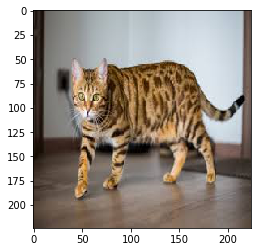

In [235]:
plt.imshow(cat_img_array[3])

## テストセット作成

In [236]:
import numpy  as np
import os
import glob 
import re

import matplotlib.pyplot as plt

from PIL import Image

%matplotlib inline

## globを使用する場合

In [239]:
img_list = glob.glob(path + '/*' + ".jpeg")

In [240]:
img_list 

['./test/cat1.jpeg',
 './test/dog1.jpeg',
 './test/cat4.jpeg',
 './test/dog3.jpeg',
 './test/dog2.jpeg',
 './test/cat5.jpeg',
 './test/cat2.jpeg',
 './test/dog5.jpeg',
 './test/dog4.jpeg',
 './test/cat3.jpeg']

# イメージのロード、配列化、リサイズ、データセット作成

In [241]:
# np.resizeはだめ、ぜったい

dog_img_array = np.empty((0,224,224,3))
cat_img_array = np.empty((0,224,224,3))

for img in img_list:
    
    # ファイル名に'dog'が含まれるイメージ
    if re.search('dog', img):
        
        dog_img = Image.open(img)
        
        # サイズを揃える
        dog_img = dog_img.resize((224, 224))
        
        # PIL.Image.Imageからnumpy配列へ
        dog_img = np.array(dog_img)
        
        # 正規化
        dog_img = dog_img / 255.0
        
        # axisの追加
        dog_img = dog_img.reshape((1,224,224,3))
        
        dog_img_array = np.concatenate([dog_img_array, dog_img], axis = 0)
    
    # ファイル名に'cat'が含まれるイメージ
    if re.search('cat', img):
        
        cat_img = Image.open(img)
        
        cat_img = cat_img.resize((224, 224))
        
        cat_img = np.array(cat_img)
        
        cat_img = cat_img / 255.0
        
        cat_img = cat_img.reshape((1,224,224,3))
        
        cat_img_array = np.concatenate([cat_img_array, cat_img], axis = 0)


In [242]:
print('dog_image:{}  cat_image:{}'.format(dog_img_array.shape, cat_img_array.shape))

dog_image:(5, 224, 224, 3)  cat_image:(5, 224, 224, 3)


In [243]:
dog_cat_test = np.concatenate([dog_img_array,cat_img_array], axis=0)

In [244]:
dog_label = np.ones(5)
cat_label = np.zeros(5)
y_test = np.concatenate([dog_label,cat_label])
y_test

array([1., 1., 1., 1., 1., 0., 0., 0., 0., 0.])

In [245]:
y_test_onehot = np_utils.to_categorical(y_test)
y_test_onehot

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.]], dtype=float32)

# イメージの表示

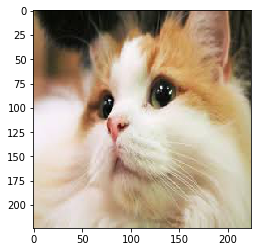

In [273]:
plt.imshow(cat_img_array[4])

## 【問題1】自作データセットでの分類の学習


In [247]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import np_utils
from keras.optimizers import RMSprop
from sklearn.model_selection import train_test_split

In [248]:
x_train, x_valid, y_train, y_valid = train_test_split(dog_cat_image, y_train_onehot, test_size=0.2)

In [249]:
x_train.shape

(8, 224, 224, 3)

In [310]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax'))

In [311]:
model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
                    batch_size=8,
                    epochs=10,
                    verbose=1,
                    validation_data=(x_valid, y_valid))


Train on 8 samples, validate on 2 samples
Epoch 1/10
8/8 [==============================] - 18s 2s/step - loss: 0.5944 - acc: 0.6250 - val_loss: 16.1181 - val_acc: 0.0000e+00
Epoch 2/10
8/8 [==============================] - 5s 612ms/step - loss: 8.0590 - acc: 0.5000 - val_loss: 16.1181 - val_acc: 0.0000e+00
Epoch 3/10
8/8 [==============================] - 4s 531ms/step - loss: 10.4623 - acc: 0.2500 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 4/10
8/8 [==============================] - 5s 565ms/step - loss: 10.0738 - acc: 0.3750 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 5/10
8/8 [==============================] - 4s 552ms/step - loss: 10.0738 - acc: 0.3750 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 6/10
8/8 [==============================] - 5s 563ms/step - loss: 10.0738 - acc: 0.3750 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 7/10
8/8 [==============================] - 4s 492ms/step - loss: 10.0738 - acc: 0.3750 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 8/10
8/8 

In [312]:
score = model.evaluate(dog_cat_test, y_test_onehot, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 8.05904769897461
Test accuracy: 0.5


## 【問題2】分類データセットに対するデータ拡張


### keras ImageDataGeneratorを使う

In [290]:
from keras.preprocessing.image import ImageDataGenerator

In [291]:
train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.8,
    zoom_range=0.6,
    horizontal_flip=True,
    featurewise_center=True,
    featurewise_std_normalization=True,
    zca_whitening=True
)

validation_datagen = ImageDataGenerator(
    rescale=1. / 255,
    featurewise_center=True,
    featurewise_std_normalization=True,
    zca_whitening=True
)

/Users/takamoriyuki/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/keras_preprocessing/image/image_data_generator.py:341: UserWarning: This ImageDataGenerator specifies `zca_whitening` which overrides setting of`featurewise_std_normalization`.
  warnings.warn('This ImageDataGenerator specifies '


In [305]:
img_height, img_width = 200,150 
train_generator = train_datagen.flow_from_directory(
    './training2/',
    target_size=(img_height, img_width),
    batch_size=50,
    class_mode='categorical')

validation_generator = validation_datagen.flow_from_directory(
    './test2/',
    target_size=(img_height, img_width),
    batch_size=50,
    class_mode='categorical')

Found 10 images belonging to 2 classes.
Found 10 images belonging to 2 classes.


In [306]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(img_height, img_width, 3)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax'))

In [307]:
model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

history = model.fit_generator(
    train_generator,
    steps_per_epoch=50,
    epochs=10,
    validation_data=validation_generator,
    validation_steps=100)

Epoch 1/10


/Users/takamoriyuki/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/keras_preprocessing/image/image_data_generator.py:716: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/Users/takamoriyuki/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/keras_preprocessing/image/image_data_generator.py:735: UserWarning: This ImageDataGenerator specifies `zca_whitening`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


50/50 [==============================] - 105s 2s/step - loss: 1.7918 - acc: 0.7480 - val_loss: 3.2434 - val_acc: 0.3000
Epoch 2/10
50/50 [==============================] - 101s 2s/step - loss: 0.1932 - acc: 0.9540 - val_loss: 6.1577 - val_acc: 0.3000
Epoch 3/10
50/50 [==============================] - 105s 2s/step - loss: 0.2641 - acc: 0.9400 - val_loss: 8.0596 - val_acc: 0.5000
Epoch 4/10
50/50 [==============================] - 112s 2s/step - loss: 0.0429 - acc: 0.9840 - val_loss: 8.3754 - val_acc: 0.4000
Epoch 5/10
50/50 [==============================] - 116s 2s/step - loss: 0.2951 - acc: 0.9720 - val_loss: 7.6356 - val_acc: 0.3000
Epoch 6/10
50/50 [==============================] - 112s 2s/step - loss: 0.0062 - acc: 0.9980 - val_loss: 8.0861 - val_acc: 0.4000
Epoch 7/10
50/50 [==============================] - 113s 2s/step - loss: 0.6051 - acc: 0.9400 - val_loss: 10.3350 - val_acc: 0.3000
Epoch 8/10
50/50 [==============================] - 102s 2s/step - loss: 0.0446 - acc: 0.9960

## 【問題3】物体検出データセットの用意


In [313]:
# 画像をリシェイプしてからアノテーション
#cv2 rectangle git 足し算しない yoloじゃない
# np load text
# elementtree
#https://github.com/albu/albumentations/blob/master/notebooks/example_bboxes.ipynb
import cv2

import numpy  as np
import os
import glob 
import re

import matplotlib.pyplot as plt

from PIL import Image

%matplotlib inline

In [314]:
path = './training/' 

In [315]:
img_list = glob.glob(path + '/*' + ".jpeg")

In [316]:
# np.resizeはだめ、ぜったい

dog_img_array = np.empty((0,224,224,3))
cat_img_array = np.empty((0,224,224,3))

for img in img_list:
    
    # ファイル名に'dog'が含まれるイメージ
    if re.search('dog', img):
        
        dog_img = Image.open(img)
        
        # サイズを揃える
        dog_img = dog_img.resize((224, 224))
        
        # PIL.Image.Imageからnumpy配列へ
        dog_img = np.array(dog_img)
        
        # 正規化
        dog_img = dog_img / 255.0
        
        # axisの追加
        dog_img = dog_img.reshape((1,224,224,3))
        
        dog_img_array = np.concatenate([dog_img_array, dog_img], axis = 0)
    
    # ファイル名に'cat'が含まれるイメージ
    if re.search('cat', img):
        
        cat_img = Image.open(img)
        
        cat_img = cat_img.resize((224, 224))
        
        cat_img = np.array(cat_img)
        
        cat_img = cat_img / 255.0
        
        cat_img = cat_img.reshape((1,224,224,3))
        
        cat_img_array = np.concatenate([cat_img_array, cat_img], axis = 0)


In [317]:
cat_dog_image = np.concatenate([cat_img_array,dog_img_array], axis=0)

## 【問題4】物体検出データセットに対するデータ拡張